In [2]:
import matplotlib.pyplot as plt
import cv2,os
data_path=r"D:\Knee Dataset\Data"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'0Normal': 0, '1Mild': 1, '2Moderate': 2, '3Severe': 3}
['0Normal', '1Mild', '2Moderate', '3Severe']
[0, 1, 2, 3]


In [3]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [4]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
label=np.array(label)
from keras.utils import np_utils
new_label=np_utils.to_categorical(label)

In [5]:
new_label.shape

(1832, 4)

In [6]:
data.shape

(1832, 256, 256, 3)

In [7]:
data.shape[1:]

(256, 256, 3)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.3)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential, layers, Model, callbacks




base_model = VGG16(input_shape=data.shape[1:], weights='imagenet', include_top=False)







In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
import tensorflow as tf

x = layers.Flatten()(base_model.output)
prediction = layers.Dense(4, activation = "softmax")(x)
model =  tf.keras.models.Model(inputs=base_model.input, outputs=prediction)
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [12]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
batchSize=20
ep=20
history= model.fit(x_train,y_train,batch_size=batchSize,epochs=20,validation_split=.15)

Epoch 1/20
55/55 [==============================] - 261s 5s/step - loss: 1.2494 - accuracy: 0.5106 - val_loss: 0.8498 - val_accuracy: 0.6891
Epoch 2/20
55/55 [==============================] - 266s 5s/step - loss: 0.5848 - accuracy: 0.7870 - val_loss: 0.6802 - val_accuracy: 0.7409
Epoch 3/20
55/55 [==============================] - 275s 5s/step - loss: 0.4802 - accuracy: 0.8200 - val_loss: 0.5320 - val_accuracy: 0.8187
Epoch 4/20
55/55 [==============================] - 270s 5s/step - loss: 0.3381 - accuracy: 0.8916 - val_loss: 0.7675 - val_accuracy: 0.7098
Epoch 5/20
55/55 [==============================] - 246s 4s/step - loss: 0.2954 - accuracy: 0.9008 - val_loss: 0.7068 - val_accuracy: 0.6995
Epoch 6/20
55/55 [==============================] - 242s 4s/step - loss: 0.2356 - accuracy: 0.9357 - val_loss: 0.4255 - val_accuracy: 0.8705
Epoch 7/20
55/55 [==============================] - 241s 4s/step - loss: 0.2013 - accuracy: 0.9385 - val_loss: 0.4686 - val_accuracy: 0.8238
Epoch 8/20
55

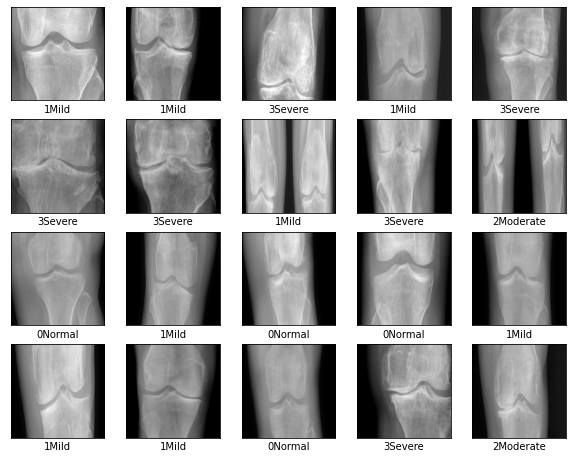

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

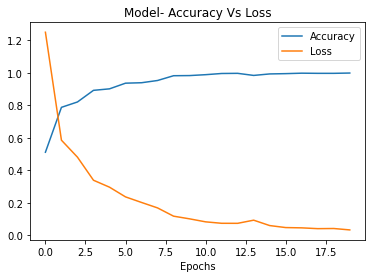

In [15]:
plt.plot(history.history['accuracy']),model.history.history['accuracy']
plt.plot(history.history['loss']),model.history.history['loss']
plt.title('Model- Accuracy Vs Loss')
plt.xlabel('Epochs')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [16]:
model.save('knee_model.h5')

In [17]:
from matplotlib import pyplot as plt

In [18]:
# # plot the training loss and accuracy
# N = 100 #number of epochs
# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
# plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
# plt.title("Training Loss and Accuracy")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="center right")
# plt.savefig("CNN_Model")

In [19]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 0.3112935423851013 %
test accuracy: 0.918181836605072 %


1/1 [==============================] - 0s 347ms/step
A.I predicts: 3Severe
Correct prediction for label 3 is 3Severe


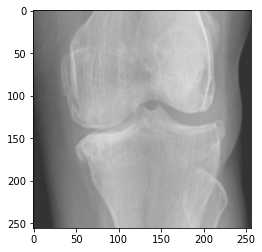

In [20]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,3)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()